# 5. Assignment

## Portfolio Management
### MLP Training

#### January 2025

Questions?
* Contact: Mark Hendricks
* hendricks@uchicago.edu

***

# 1. The Factors

### 1. 

Describe how each of the factors (other than MKT) is measured. Is the factor portfolio...
* long-only
* long-short
* value-weighted
* equally-weighted

### 2. 

Use the data found in `factor_pricing_data.xlsx`.

* FACTORS: Monthly excess return data for the overall equity market, $\tilde{r}^{\text{MKT}}$.
* The column header to the market factor is `MKT` rather than `MKT-RF`, but it is indeed already in excess return form.
* The sheet also contains data on five additional factors.
* All factor data is already provided as excess returns

In [13]:
import pandas as pd
import numpy as np

SCALE = 52
path = '../data/factor_pricing_data.xlsx'
factors_xret = pd.read_excel(path, 'factors (excess returns)').set_index('Date')
portfolios_xret = pd.read_excel(path, 'portfolios (excess returns)').set_index('Date')
rf_rate = pd.read_excel(path, 'risk-free rate').set_index('Date')

In [14]:
display(factors_xret.head())
display(portfolios_xret.head())
display(rf_rate.head())

,MKT,SMB,HML,RMW,CMA,UMD
Date,,,,,,
1980-01-31,0.0551,0.0183,0.0175,-0.0170,0.0164,0.0755
1980-02-29,-0.0122,-0.0157,0.0061,0.0004,0.0268,0.0788
1980-03-31,-0.1290,-0.0693,-0.0101,0.0146,-0.0119,-0.0955
1980-04-30,0.0397,0.0105,0.0106,-0.0210,0.0029,-0.0043
1980-05-31,0.0526,0.0211,0.0038,0.0034,-0.0031,-0.0112


,Agric,Food,Soda,Beer,Smoke,Toys,Fun,Books,Hshld,Clths,...,Boxes,Trans,Whlsl,Rtail,Meals,Banks,Insur,RlEst,Fin,Other
Date,,,,,,,,,,,,,,,,,,,,,
1980-01-31,-0.0076,0.0285,0.0084,0.1009,-0.0143,0.1002,0.0362,0.0323,0.0048,0.0059,...,0.0158,0.0875,0.0465,-0.0126,0.0430,-0.0283,0.0258,0.0768,0.0308,0.0669
1980-02-29,0.0105,-0.0608,-0.0966,-0.0322,-0.0569,-0.0323,-0.0521,-0.0800,-0.0555,-0.0167,...,-0.0079,-0.0541,-0.0346,-0.0639,-0.0652,-0.0854,-0.0959,-0.0347,-0.0282,-0.0274
1980-03-31,-0.2224,-0.1119,-0.0167,-0.1469,-0.0193,-0.1271,-0.0826,-0.1237,-0.0566,-0.0668,...,-0.0819,-0.1509,-0.1098,-0.0906,-0.1449,-0.0560,-0.0880,-0.2451,-0.1254,-0.1726
1980-04-30,0.0449,0.0766,0.0232,0.0321,0.0830,-0.0529,0.0783,0.0153,0.0304,0.0115,...,0.0420,-0.0103,-0.0312,0.0353,0.0542,0.0728,0.0530,0.0977,0.0447,0.0769
1980-05-31,0.0632,0.0793,0.0457,0.0863,0.0815,0.0509,0.0324,0.0886,0.0560,0.0098,...,0.0564,0.1063,0.1142,0.0877,0.1134,0.0578,0.0557,0.0915,0.0844,0.0685


,RF
Date,
1980-01-31,0.0080
1980-02-29,0.0089
1980-03-31,0.0121
1980-04-30,0.0126
1980-05-31,0.0081


Show the following for each factor:
* mean
* volatility
* Sharpe

In [15]:
mean_xret = factors_xret.mean() * SCALE
mean.name = 'Mean Xret'

mean_xret 

MKT    0.373866
SMB    0.036051
HML    0.111839
RMW    0.204081
CMA    0.127992
UMD    0.271739
dtype: float64

In [16]:
vol = factors_xret.std() * np.sqrt(SCALE)
vol.name = 'Vol'

vol 

MKT    0.326621
SMB    0.212065
HML    0.228981
RMW    0.173222
CMA    0.152136
UMD    0.321751
Name: Vol, dtype: float64

In [17]:
sharpe_ratio = mean_xret / vol
sharpe_ratio.name = 'Sharpe Ratio'

sharpe_ratio

MKT    1.144649
SMB    0.169999
HML    0.488420
RMW    1.178144
CMA    0.841300
UMD    0.844561
Name: Sharpe Ratio, dtype: float64

### 3. 

Report the correlation matrix across the six factors.

In [19]:
ccorr = factors_xret.corr()
corr

,MKT,SMB,HML,RMW,CMA,UMD
MKT,1.000000,0.227756,-0.204356,-0.246768,-0.357823,-0.175585
SMB,0.227756,1.000000,-0.029072,-0.414055,-0.049575,-0.055304
HML,-0.204356,-0.029072,1.000000,0.219651,0.678450,-0.216986
RMW,-0.246768,-0.414055,0.219651,1.000000,0.127209,0.079525
CMA,-0.357823,-0.049575,0.678450,0.127209,1.000000,0.008398
UMD,-0.175585,-0.055304,-0.216986,0.079525,0.008398,1.000000


<Axes: >

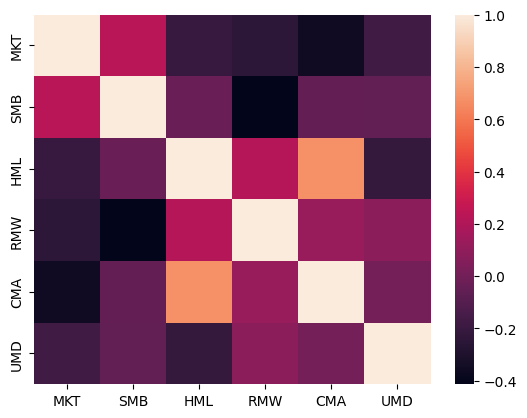

In [20]:
import seaborn as sns

sns.heatmap(corr)

***

# 2. Testing Factor-Pricing Models

Consider the following factor models:
* CAPM: MKT
* Fama-French 3F: MKT, SMB, HML
* 4-Factor: MKT, HML, RMW, UMD

For instance, for the 4-Factor model is...

US equities + Long high book to market, short book to market + long high profitability short low profitability + long with high recent returns short with low recent returns (momentum)

![](../refs/LFP-4-factors.png)

We will test these models with the time-series regressions. Namely, for each asset i, estimate the following regression to test the 4-Factor model:

![](../refs/LFD-4-factors.png)

Data
* PORTFOLIOS: Monthly excess return data on 49 equity portfolios sorted by their industry. Denote these as $\tilde{r}^i$ , for $n = 1, . . . , 49.$

* You do NOT need the risk-free rate data. It is provided only for completeness. The other two tabs are already in terms of excess returns.

In [48]:
import statsmodels.api as sm

factors = factors_xret.columns

capm_data = []
for portfolio in portfolios_xret.columns:
    portfolio_xret = portfolios[portfolio]
    y = portfolio_xret * SCALE # try to explain our portfolio return
    X = factors_xret['MKT'] * SCALE # with the factors at hand
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    alpha = model.params.get('const')
    r_squared = model.rsquared
    capm_data.append({'portfolio': portfolio, 'alpha': alpha, 'r-squared': r_squared})

capm_alpha_r_2 = pd.DataFrame(data=capm_data).set_index('portfolio')
capm_alpha_r_2

,alpha,r-squared
portfolio,,
Agric,0.088150,0.330534
Food,0.198558,0.366464
Soda,0.203996,0.253740
Beer,0.257568,0.333662
Smoke,0.352037,0.189975
Toys,-0.163274,0.495417
Fun,0.029871,0.599294
Books,-0.062689,0.652329
Hshld,0.091778,0.493945


### 1. Test the CAPM

* For each regression, report the estimated alpha and r-squared.
* Calculate the mean of the absolute value of the estimated alphas.
* If the pricing model worked, should these alpha estimates be large or small? Why?

In [49]:
capm_alpha_mean_abs = capm_alpha_r_2['alpha'].abs().mean()
capm_alpha_mean_abs

np.float64(0.0884068000070558)



### 2. Test the 4-Factor Model.
   
Report the same statistics as above, in testing the CAPM.

In [50]:
import statsmodels.api as sm

factors = factors_xret.columns

result_data = []
for portfolio in portfolios_xret.columns:
    portfolio_xret = portfolios[portfolio]
    y = portfolio_xret * SCALE # try to explain our portfolio return
    X = factors_xret * SCALE # with the factors at hand
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    alpha = model.params.get('const')
    r_squared = model.rsquared
    result_data.append({'portfolio': portfolio, 'alpha': alpha, 'r-squared': r_squared})

alpha_r_2 = pd.DataFrame(data=result_data).set_index('portfolio')
alpha_r_2

,alpha,r-squared
portfolio,,
Agric,-0.017271,0.365211
Food,-0.016191,0.491044
Soda,0.024117,0.318489
Beer,0.026579,0.445008
Smoke,0.069047,0.307616
Toys,-0.243753,0.560750
Fun,0.134284,0.627379
Books,-0.166118,0.706763
Hshld,-0.089772,0.589457


In [51]:
alpha_mean_abs = alpha_r_2['alpha'].abs().mean()
alpha_mean_abs

np.float64(0.12260465810717303)

***